<a href="https://colab.research.google.com/github/gabyneko88/proyecto_videojuegos/blob/main/c9422a73_b3ae_49fc_a64f_3d6d61cab188.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto tienda videojuegos


Descripción de datos
— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género)

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)

— EU_sales (ventas en Europa en millones de dólares estadounidenses)

— JP_sales (ventas en Japón en millones de dólares estadounidenses)

— Other_sales (ventas en otros países en millones de dólares estadounidenses)

— Critic_Score (máximo de 100)

— User_Score (máximo de 10)

— Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Abre el archivo de datos y estudia la información general

Ruta de archivo:

/datasets/games.csv . Descarga el dataset

In [ ]:
df = pd.read_csv("/datasets/games.csv")

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Prepara los datos

1.-Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

2.-Convierte los datos en los tipos necesarios.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


3.-Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

No considero cambiar ninguna.

4.- Si es necesario, elige la manera de tratar los valores ausentes:
Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

In [ ]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

-------

5.-Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [ ]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales']

In [ ]:
df.fillna('Sin calificar', inplace=True)

In [ ]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
7126,Sword Art Online: Infinity Moment,PSP,2013.0,Role-Playing,0.00,0.00,0.22,0.00,Sin calificar,Sin calificar,Sin calificar,0.00
686,Need For Speed: High Stakes,PS,1999.0,Racing,1.58,0.64,0.00,0.09,86.0,8.5,E,2.22
4278,Missile Command,PS,1999.0,Shooter,0.25,0.17,0.00,0.03,Sin calificar,Sin calificar,Sin calificar,0.42
15031,Jikkyou Powerful Pro Yakyuu 12 Ketteiban,GC,2005.0,Sports,0.00,0.00,0.02,0.00,Sin calificar,Sin calificar,Sin calificar,0.00
128,Donkey Kong Country Returns,Wii,2010.0,Platform,3.17,1.79,1.03,0.46,87.0,8.6,E,4.96
12057,Digimon World Championship,DS,2008.0,Role-Playing,0.00,0.00,0.07,0.00,49.0,6.5,E,0.00
10984,Prinny: Can I Really Be the Hero?,PSP,2008.0,Platform,0.03,0.00,0.05,0.01,72.0,7,T,0.03
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M,9.83
16386,CT Special Forces 2: Back in the Trenches,GBA,2003.0,Shooter,0.01,0.00,0.00,0.00,76.0,tbd,T,0.01
16613,Dragon Ball Z for Kinect,X360,2012.0,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01


## Analiza los datos

1.-Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

<AxesSubplot:xlabel='year_of_release'>

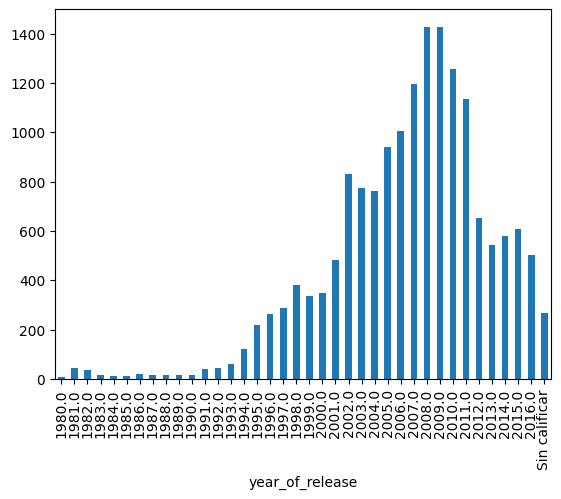

In [ ]:
d3_1 = df.groupby('year_of_release')['name'].count()
d3_1.plot(kind='bar')

Análisis del número de juegos lanzados por año:
Décadas de 1980 y principios de 1990:

Muy pocos lanzamientos por año.

Datos poco representativos o incompletos.

Podrían no ser confiables para hacer análisis sólidos.

1995 a 2011:

Se observa un crecimiento sostenido en el número de juegos.

El pico más alto está entre 2007 y 2009 , con más de 1400 lanzamientos en un año.

Este período es claramente el más significativo y representativo del mercado.

A partir de 2012:

Hay una disminución notable en el número de lanzamientos.

Podría deberse a cambios en la industria o datos faltantes en el conjunto de datos.

Se debe tener precaución si se usan estos años para modelar o predecir.

2.-Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

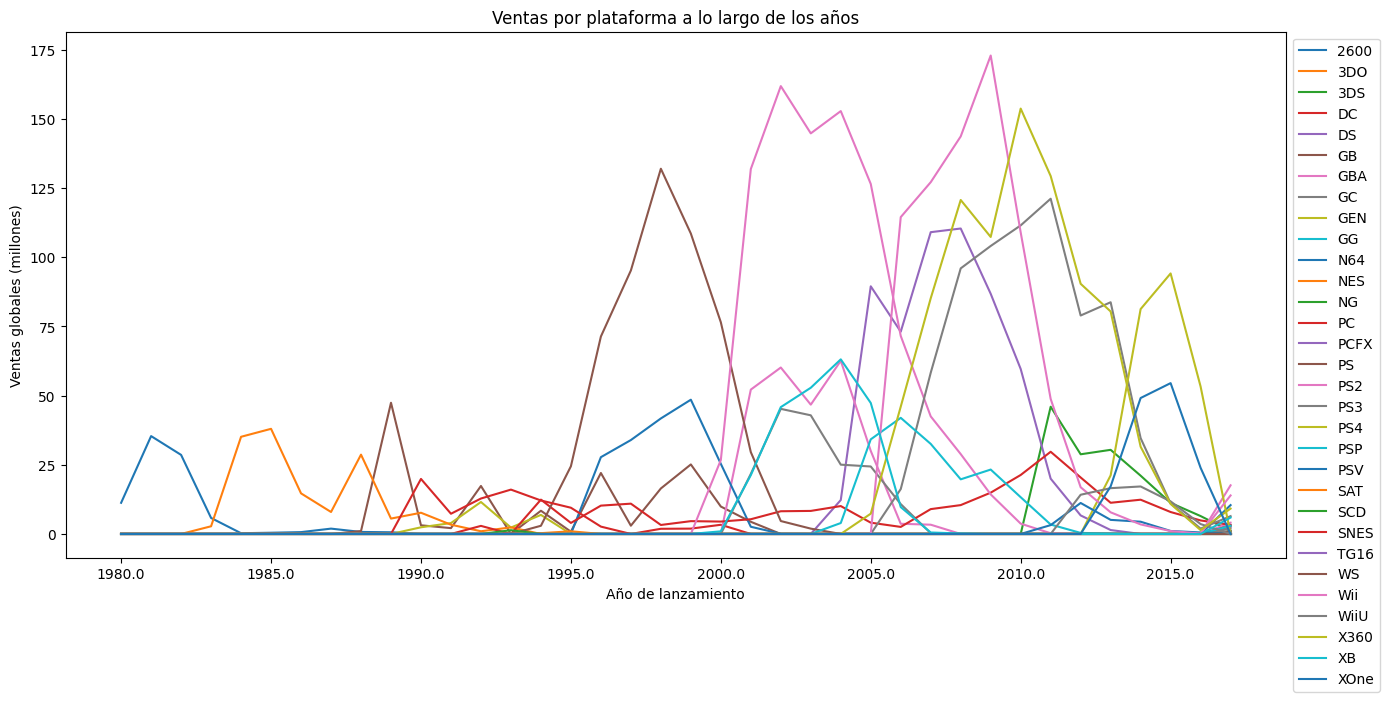

In [ ]:
ventas_anuales = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

ventas_anuales.plot(figsize=(14, 7), title='Ventas por plataforma a lo largo de los años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [ ]:
df_c = df[df['year_of_release'] != 'Sin calificar']

In [ ]:
d32 = df_c.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
d32['tiempovida'] = d32['max'] - d32['min']
d32.describe()

,min,max,tiempovida
count,31.000000,31.000000,31.000000
mean,1997.645161,2005.258065,7.612903
std,9.094131,9.273503,6.998464
min,1980.000000,1989.000000,0.000000
25%,1992.500000,1996.000000,3.000000
50%,1996.000000,2007.000000,6.000000
75%,2004.500000,2016.000000,10.000000
max,2013.000000,2016.000000,31.000000


Resumen final:
Las plataformas más exitosas en términos de ventas fueron PS2, DS, Wii y X360 .

Muchas consolas tienen un ciclo de vida comercial de alrededor de 6-10 años .

Plataformas como PS2, GBA, Wii y DS fueron muy populares pero ya están fuera delfueron muy pero populares ya están fuera del mercado.

La curva de popularidad muestra una entrada rápida al mercado , un pico en 3 - 5 años y luego una caen 3-5 años y luego una caída gradual .



3.-Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

In [ ]:
# Filtrar el dataframe para EJ los ultimos 3 años, o 4, o 5

#df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
#año_máximo = df['year_of_release'].max()
df4 = df_c[df_c['year_of_release'] >= 2011]
print(df4['year_of_release'].unique())

[2013.0 2011.0 2015.0 2012.0 2014.0 2016.0]


4.-Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

<AxesSubplot:ylabel='platform'>

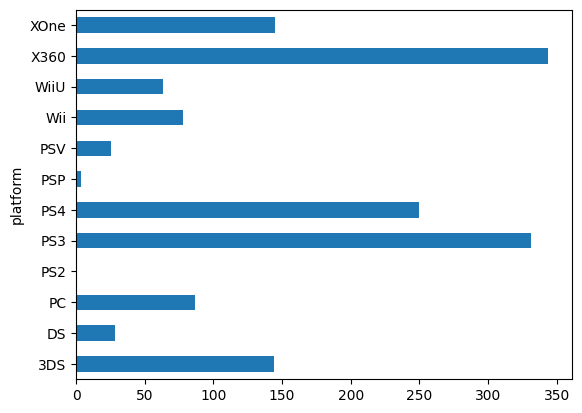

In [ ]:
g4 =df4.groupby('platform')['total_sales'].sum()
g4.plot(kind='barh')

<AxesSubplot:ylabel='platform'>

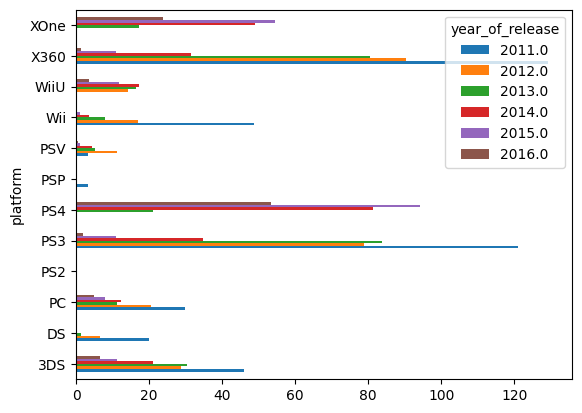

In [ ]:
g4 =df4.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()
g4.plot(kind='barh')

5.-Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

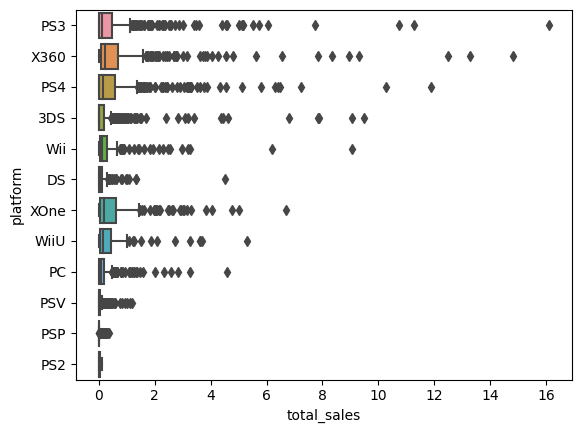

In [ ]:
sns.boxplot(data=df4, x='total_sales', y='platform')

6.-Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [ ]:
ps3 = df[(df['platform'] == 'PS3') & df['user_score'] != 'Sin clasificar']
ps3 = ps3.dropna(subset=['user_score', 'critic_score', 'total_sales'])
ps3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,70.32
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,Sin calificar,Sin calificar,Sin calificar,32.66
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,28.44
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,26.54
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,Sin calificar,Sin calificar,Sin calificar,20.16


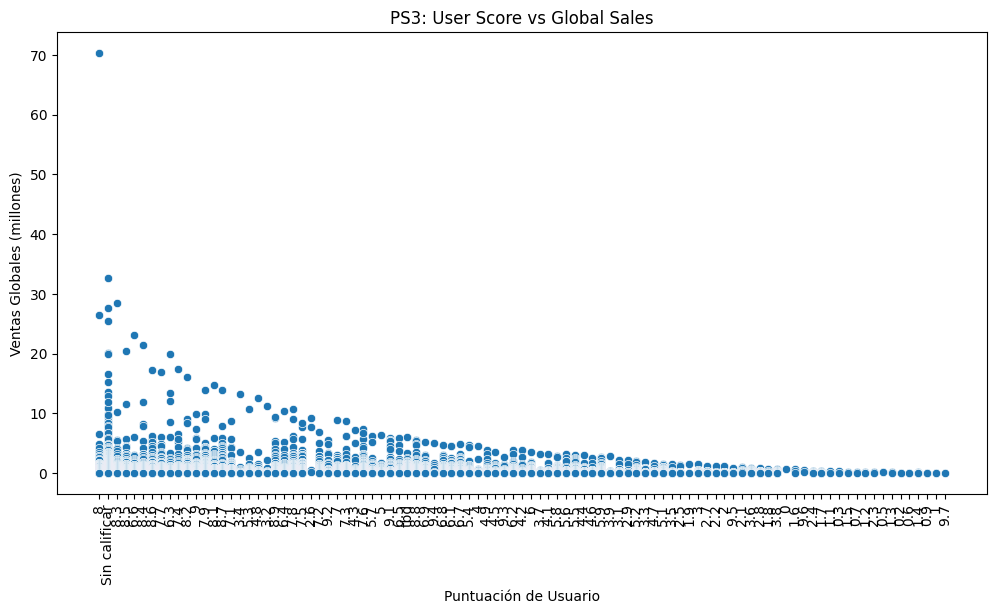

In [ ]:
# Para UNA plataforma Ps3
plt.figure(figsize=(12,6))
sns.scatterplot(data=ps3, x='user_score', y='total_sales')
plt.xticks(rotation=90)
plt.title("PS3: User Score vs Global Sales")
plt.xlabel("Puntuación de Usuario")
plt.ylabel("Ventas Globales (millones)")
plt.show()

7.-Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Muy buen análisis exploratorio. Has incorporado correctamente visualizaciones, interpretaciones por períodos y comparaciones entre plataformas, lo cual aporta una visión clara del comportamiento del mercado de videojuegos a lo largo del tiempo. </div>

##### Buscar generos mas rentables

## Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  object 
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  object 
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(5), object(7)
memory usage: 1.5+ MB


In [ ]:
df = df.dropna(subset=['na_sales', 'eu_sales', 'jp_sales', 'genre', 'platform'])
platforms = {
    'NA': df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5),
    'EU': df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5),
    'JP': df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
}
for region, data in platforms.items():
    print(f"Top 5 plataformas en {region}:\n{data}\n")

Top 5 plataformas en NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en EU:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas en JP:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64



In [ ]:
ratings = {
    'NA': df.groupby('rating')['na_sales'].sum().sort_values(ascending=False),
    'EU': df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False),
    'JP': df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
}

for region, data in ratings.items():
    print(f"Ventas por ESRB en {region}:\n{data}\n")

Ventas por ESRB en NA:
rating
E                1292.99
Sin calificar    1242.46
T                 759.75
M                 748.48
E10+              353.32
K-A                 2.56
EC                  1.53
AO                  1.26
RP                  0.00
Name: na_sales, dtype: float64

Ventas por ESRB en EU:
rating
E                710.25
Sin calificar    613.83
M                483.97
T                427.03
E10+             188.52
AO                 0.61
K-A                0.27
EC                 0.11
RP                 0.08
Name: eu_sales, dtype: float64

Ventas por ESRB en JP:
rating
Sin calificar    841.96
E                198.11
T                151.40
M                 64.24
E10+              40.20
K-A                1.46
AO                 0.00
EC                 0.00
RP                 0.00
Name: jp_sales, dtype: float64



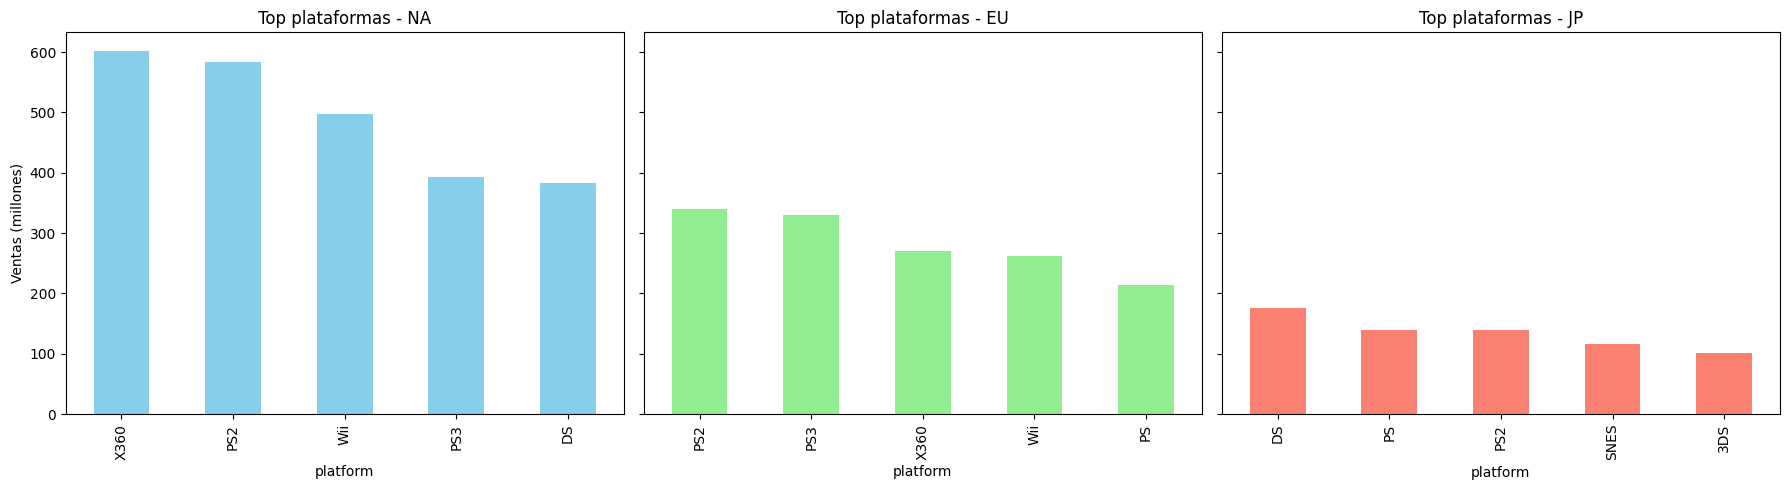

In [ ]:
top_platforms_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)


top_platforms_na.plot(kind='bar', ax=axes[0], title='Top plataformas - NA', color='skyblue')
axes[0].set_ylabel('Ventas (millones)')

top_platforms_eu.plot(kind='bar', ax=axes[1], title='Top plataformas - EU', color='lightgreen')

top_platforms_jp.plot(kind='bar', ax=axes[2], title='Top plataformas - JP', color='salmon')

plt.tight_layout()
plt.show()

## Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,70.32
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,Sin calificar,Sin calificar,Sin calificar,32.66
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,28.44
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,26.54
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,Sin calificar,Sin calificar,Sin calificar,20.16


In [ ]:
import numpy as np
import scipy.stats as stats

df = df[(df['user_score'] != 'Sin calificar') & (df['user_score'] != 'tbd')]

# 1) Definimos nivel de significación
alpha = 0.05

# 2) Preparamos los dos pares de muestras
# Ajusta los strings de plataforma si en tu df aparecen distinto ("XOne" vs "Xbox One", etc.)
xbox = df.loc[df['platform']=='XOne', 'user_score'].dropna().astype(float)
pc   = df.loc[df['platform']=='PC',   'user_score'].dropna().astype(float)

action = df.loc[df['genre']=='Action', 'user_score'].dropna().astype(float)
sports = df.loc[df['genre']=='Sports', 'user_score'].dropna().astype(float)

In [ ]:
# funcion para testear
def test_independent(sample1, sample2, name1, name2):
    print(f"\n=== Comparación {name1} vs {name2} ===")
    # a) Hipótesis
    print("H0: medias iguales")
    print("H1: medias diferentes (two tailed)\n")
    # b) Levene para varianzas
    stat_lev, p_lev = stats.levene(sample1, sample2)
    print(f"Levene’s test: W={stat_lev:.3f}, p value={p_lev:.3f}")
    eq_var = (p_lev > alpha)
    print(f"-> Varianzas {'IGUALES' if eq_var else 'DIFERENTES'} (usar equal_var={eq_var})\n")
    # c) t test
    t_stat, p_t = stats.ttest_ind(sample1, sample2, equal_var=eq_var)
    print(f"t statistic={t_stat:.3f}, p value={p_t:.3f}")
    if p_t < alpha:
        print("=> Rechazamos H0: hay diferencia significativa en las medias")
    else:
        print("=> No rechazamos H0: no hay evidencia de diferencia significativa")

# 3) Ejecutamos ambas pruebas
test_independent(xbox, pc,    "Xbox One", "PC")
test_independent(action, sports, "Action",   "Sports")


=== Comparación Xbox One vs PC ===
H0: medias iguales
H1: medias diferentes (two tailed)

Levene’s test: W=1.221, p value=0.269
-> Varianzas IGUALES (usar equal_var=True)

t statistic=-4.368, p value=0.000
=> Rechazamos H0: hay diferencia significativa en las medias

=== Comparación Action vs Sports ===
H0: medias iguales
H1: medias diferentes (two tailed)

Levene’s test: W=14.133, p value=0.000
-> Varianzas DIFERENTES (usar equal_var=False)

t statistic=1.577, p value=0.115
=> No rechazamos H0: no hay evidencia de diferencia significativa


Formato: Completa la tarea en Jupyter Notebook. Inserta el código de programación en las celdas code y las explicaciones de texto en las celdas markdown. Aplica formato y agrega encabezados.

El análisis muestra diferencias claras en las preferencias por plataformas según la región:

Norteamérica prefiere consolas como X360 y PS2 , asociadasy PS2 , asociados a juegos de acción y deportes.

Europa favorece principalmentefavorece principalmente a Sony ( PS2 , PS3 ) , con un perfil( PS2 , PS3 ), con un perfil similar al de NA.

Japón se inclina por plataformas portátiles como DS y consolas locales como PS y SNES , con gran interés en juegos de rol.

Estas variaciones reflejan diferencias culturales y de consumo, claves para tomar decisiones de mercado regionalizadas.